In [1]:
import pandas as pd

# 4개의 파일명 리스트
file_names = ['proposed.csv', 'random.csv','oort.csv' , 'towards.csv']

# 빈 DataFrame 생성
merged_data = pd.DataFrame()

# 각 파일을 순회하면서 데이터를 읽어와 병합
for file_name in file_names:
    data = pd.read_csv(file_name)  # CSV 파일 읽기
    merged_data = pd.concat([merged_data, data], ignore_index=True)  # 데이터 병합

# 특정 컬럼 제거
column_to_remove = 'Unnamed: 0'  # 삭제할 컬럼 이름을 여기에 입력
merged_data = merged_data.drop(column_to_remove, axis=1)

# 병합된 데이터를 새로운 파일에 저장
merged_data.to_csv('preprocessed_data.csv', index=False)


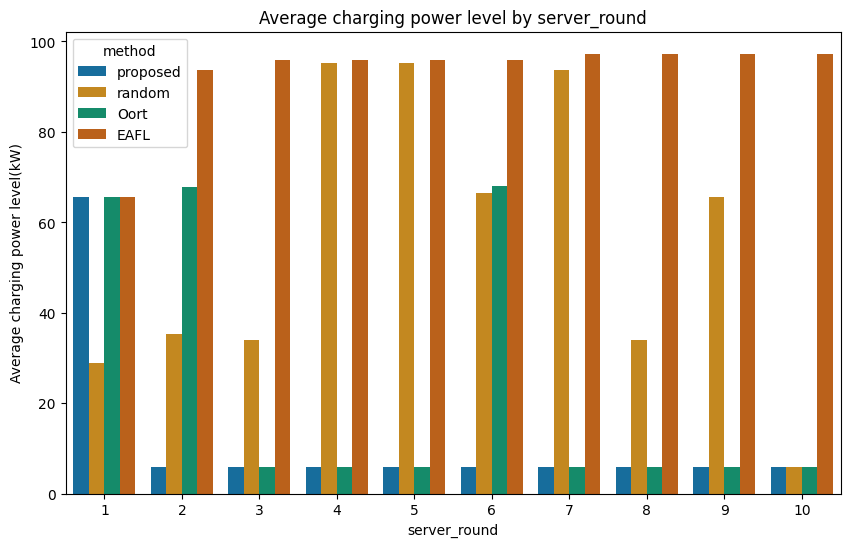

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터를 DataFrame으로 읽기
data = pd.read_csv('preprocessed_data.csv')  # 여기에서 'your_data.csv'는 실제 데이터 파일의 경로와 이름으로 바꿔야 합니다.

#'selected' 값이 1인 데이터만 선택
data = data[data['selected'] == 1]
data = data[data['learning_step'] == 'training']

data['avg_charger_output'] = data.groupby(['method', 'selected', 'server_round'])['charge_speed'].transform('mean')

# 이중 막대 그래프 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
sns.barplot(x='server_round', y='avg_charger_output', hue='method', palette='colorblind', data=data)
plt.title('Average charging power level by server_round')
plt.xlabel('server_round')
plt.ylabel('Average charging power level(kW)')
plt.show()


# Training 정확도 - 라운드

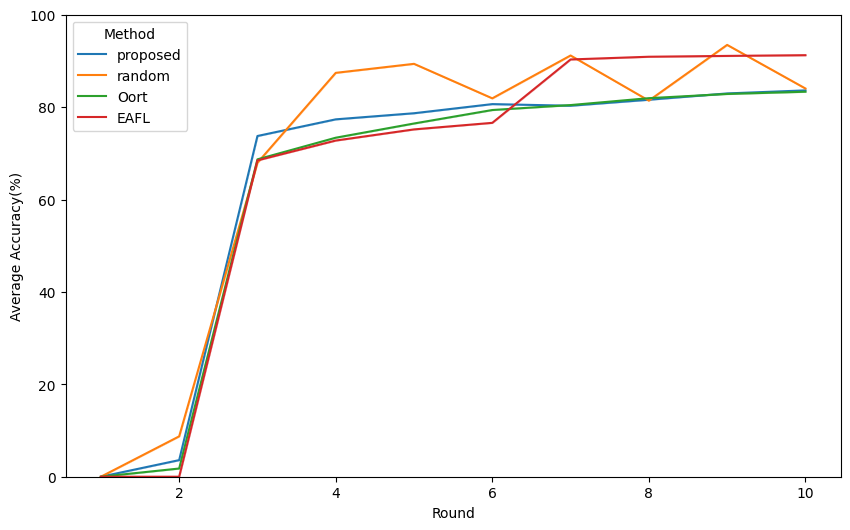

In [3]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # 데이터를 DataFrame으로 읽기
# data = pd.read_csv('preprocessed_data.csv')

# # 'selected' 값이 1인 데이터만 선택
# data = data[data['selected'] == 1]
# data = data[data['learning_step'] == 'training']

# # 'method', 그리고 'server_server_server_round'에 따른 'accuracyuracyuracyuracy'와 'loss'의 평균 계산
# avg_acc_data = data.groupby(['method','server_round'])['accuracy'].mean().reset_index()
# avg_acc_data = avg_acc_data.iloc[::-1].reset_index(drop=True)
# avg_acc_data['accuracy'] = avg_acc_data['accuracy'] * 100  # 정확도를 %로 표시

# # 그래프 그리기
# plt.figure(figsize=(6, 4))  # 그래프 크기 설정
# sns.lineplot(x='server_round', y='accuracy', hue='method', style='method', palette='colorblind', data=avg_acc_data)
# plt.xlabel('Round')
# plt.ylabel('Training Accuracy(%)')
# plt.legend(title='Method')  # 범례의 제목을 'Method'로 변경
# plt.ylim(0, 100)  # y축의 범위 설정
# plt.tight_layout()  # 그래프가 겹치지 않도록 레이아웃을 조정
# plt.show()


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터를 DataFrame으로 읽기
data = pd.read_csv('preprocessed_data.csv')

# 'selected' 값이 1인 데이터만 선택
data = data[data['selected'] == 1]
data = data[data['learning_step'] == 'training']

# # 'method', 그리고 'server_round'에 따른 'acc'와 'loss'의 평균 계산
# avg_battery_level = data.groupby(['method','server_round'])['battery_level'].mean().reset_index()
# avg_battery_level = avg_battery_level.iloc[::-1].reset_index(drop=True)

# 'method', 'selected', 그리고 'server_round'에 따른 'charge_speed'의 평균 계산
data['avg_accuracy'] = data.groupby(['method','server_round'])['accuracy'].transform('mean') * 100

# 그래프 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
sns.lineplot(x='server_round', y='avg_accuracy', hue='method', data=data)

plt.xlabel('Round')
plt.ylabel('Average Accuracy(%)')
plt.ylim(0, 100)
plt.legend(title='Method')  # 범례의 제목을 'Method'로 변경
plt.show()



#테스트 정확도 시간

6      86.789255
7      86.789255
8      86.789255
9      86.789255
10     86.789255
         ...    
474    94.797549
475    94.797549
476    94.797549
477    94.797549
478    94.797549
Name: avg_accuracy, Length: 240, dtype: float64


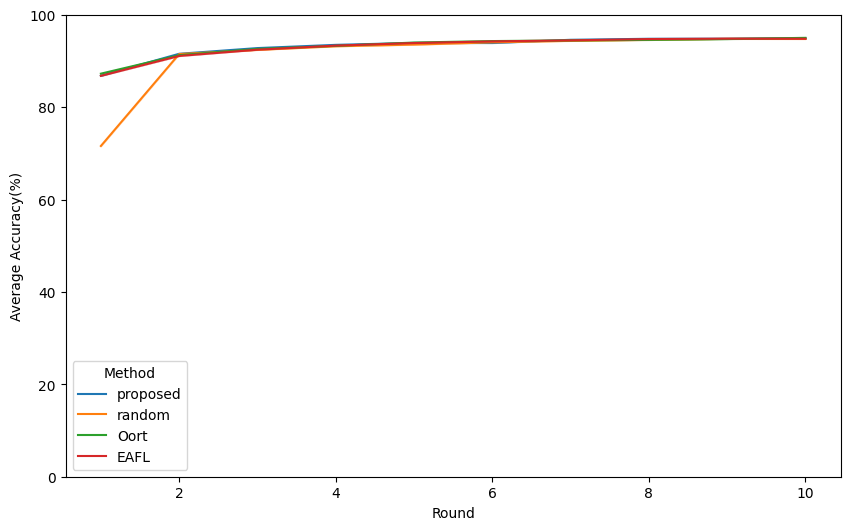

In [4]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # 데이터를 DataFrame으로 읽기
# data = pd.read_csv('preprocessed_data.csv')

# # 'selected' 값이 1인 데이터만 선택
# data = data[data['selected'] == 1]
# data = data[data['learning_step'] == 'training']

# # 'method', 그리고 'server_server_server_round'에 따른 'accuracyuracyuracyuracy'와 'loss'의 평균 계산
# avg_acc_data = data.groupby(['method','server_round'])['accuracy'].mean().reset_index()
# avg_acc_data = avg_acc_data.iloc[::-1].reset_index(drop=True)
# avg_acc_data['accuracy'] = avg_acc_data['accuracy'] * 100  # 정확도를 %로 표시

# # 그래프 그리기
# plt.figure(figsize=(6, 4))  # 그래프 크기 설정
# sns.lineplot(x='server_round', y='accuracy', hue='method', style='method', palette='colorblind', data=avg_acc_data)
# plt.xlabel('Round')
# plt.ylabel('Training Accuracy(%)')
# plt.legend(title='Method')  # 범례의 제목을 'Method'로 변경
# plt.ylim(0, 100)  # y축의 범위 설정
# plt.tight_layout()  # 그래프가 겹치지 않도록 레이아웃을 조정
# plt.show()


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터를 DataFrame으로 읽기
data = pd.read_csv('preprocessed_data.csv')

# 'selected' 값이 1인 데이터만 선택
data = data[data['selected'] == 0]
data = data[data['learning_step'] == 'evaluation']

# # 'method', 그리고 'server_round'에 따른 'acc'와 'loss'의 평균 계산
# avg_battery_level = data.groupby(['method','server_round'])['battery_level'].mean().reset_index()
# avg_battery_level = avg_battery_level.iloc[::-1].reset_index(drop=True)

# 'method', 'selected', 그리고 'server_round'에 따른 'charge_speed'의 평균 계산
data['avg_accuracy'] = data.groupby(['method','server_round'])['accuracy'].transform('mean') * 100

# 그래프 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정

print(data['avg_accuracy'])
sns.lineplot(x='server_round', y='avg_accuracy', hue='method', data=data)

plt.xlabel('Round')
plt.ylabel('Average Accuracy(%)')
plt.ylim(0, 100)
plt.legend(title='Method')  # 범례의 제목을 'Method'로 변경
plt.show()





# Loss

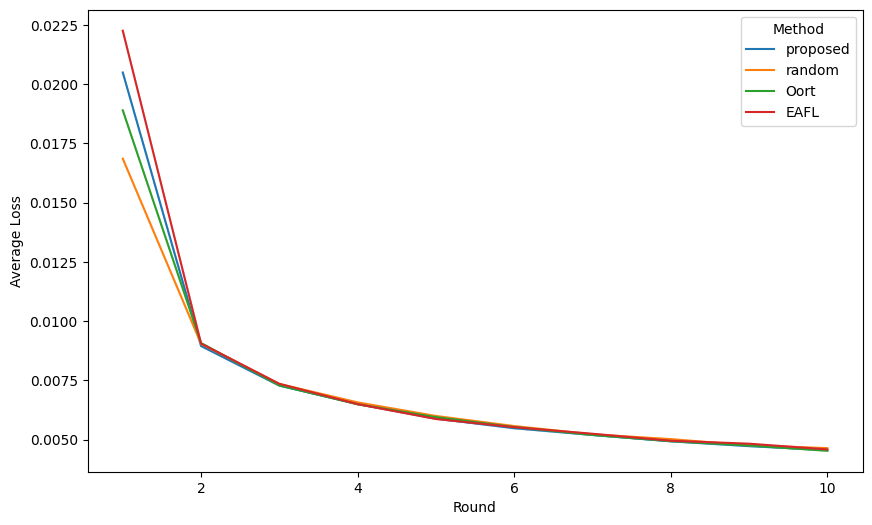

In [29]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # 데이터를 DataFrame으로 읽기
# data = pd.read_csv('preprocessed_data.csv')

# # 'selected' 값이 1인 데이터만 선택
# data = data[data['selected'] == 1]
# data = data[data['learning_step'] == 'training']

# # 'method', 그리고 'server_server_server_round'에 따른 'accuracyuracyuracyuracy'와 'loss'의 평균 계산
# avg_acc_data = data.groupby(['method','server_round'])['accuracy'].mean().reset_index()
# avg_acc_data = avg_acc_data.iloc[::-1].reset_index(drop=True)
# avg_acc_data['accuracy'] = avg_acc_data['accuracy'] * 100  # 정확도를 %로 표시

# # 그래프 그리기
# plt.figure(figsize=(6, 4))  # 그래프 크기 설정
# sns.lineplot(x='server_round', y='accuracy', hue='method', style='method', palette='colorblind', data=avg_acc_data)
# plt.xlabel('Round')
# plt.ylabel('Training Accuracy(%)')
# plt.legend(title='Method')  # 범례의 제목을 'Method'로 변경
# plt.ylim(0, 100)  # y축의 범위 설정
# plt.tight_layout()  # 그래프가 겹치지 않도록 레이아웃을 조정
# plt.show()


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터를 DataFrame으로 읽기
data = pd.read_csv('preprocessed_data.csv')

# 'selected' 값이 1인 데이터만 선택
data = data[data['selected'] == 0]
data = data[data['learning_step'] == 'evaluation']

# # 'method', 그리고 'server_round'에 따른 'acc'와 'loss'의 평균 계산
# avg_battery_level = data.groupby(['method','server_round'])['battery_level'].mean().reset_index()
# avg_battery_level = avg_battery_level.iloc[::-1].reset_index(drop=True)

# 'method', 'selected', 그리고 'server_round'에 따른 'charge_speed'의 평균 계산
data['avg_loss'] = data.groupby(['method','server_round'])['loss'].transform('mean')

# 그래프 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
sns.lineplot(x='server_round', y='avg_loss', hue='method', data=data)

plt.xlabel('Round')
plt.ylabel('Average Loss')
# plt.ylim(0, 1)
plt.legend(title='Method')  # 범례의 제목을 'Method'로 변경
plt.show()



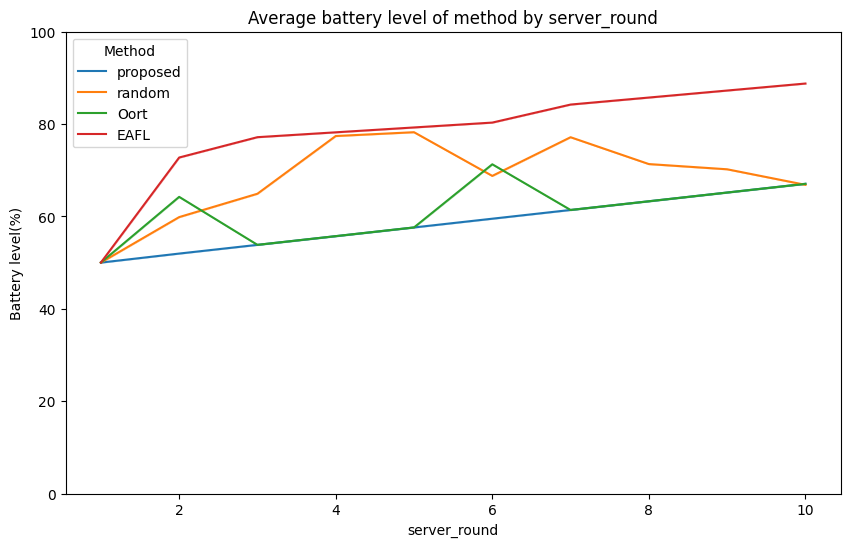

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터를 DataFrame으로 읽기
data = pd.read_csv('preprocessed_data.csv')

# 'selected' 값이 1인 데이터만 선택
data = data[data['selected'] == 1]
data = data[data['learning_step'] == 'training']

# # 'method', 그리고 'server_round'에 따른 'acc'와 'loss'의 평균 계산
# avg_battery_level = data.groupby(['method','server_round'])['battery_level'].mean().reset_index()
# avg_battery_level = avg_battery_level.iloc[::-1].reset_index(drop=True)

# 'method', 'selected', 그리고 'server_round'에 따른 'charge_speed'의 평균 계산
data['battery_level'] = data.groupby(['method','server_round'])['battery_level'].transform('mean')

# 그래프 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
sns.lineplot(x='server_round', y='battery_level', hue='method', data=data)

plt.xlabel('server_round')
plt.ylabel('Battery level(%)')
plt.legend(title='Method')  # 범례의 제목을 'Method'로 변경
plt.title('Average battery level of method by server_round')
plt.ylim(0, 100)
plt.show()


0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
460    0.224608
469    0.227317
470    0.297886
471    0.275348
472    0.256846
Name: power_consumption, Length: 167, dtype: float64


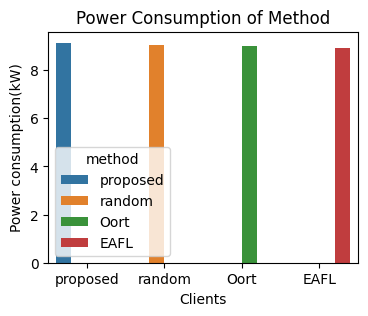

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터를 DataFrame으로 읽기
data = pd.read_csv('preprocessed_data.csv')  # 여기에서 'your_data.csv'는 실제 데이터 파일의 경로와 이름으로 바꿔야 합니다.

#'selected' 값이 1인 데이터만 선택
data = data[data['selected'] == 1]
data = data[data['learning_step'] == 'training']

print(data['power_consumption'])

# 'method', 'selected', 그리고 'server_round'에 따른 'charge_speed'의 평균 계산
data['avg_power_consumption'] = data.groupby(['method'])['power_consumption'].transform('sum')

# 이중 막대 그래프 그리기
plt.figure(figsize=(4, 3))  # 그래프 크기 설정
sns.barplot(x='method', y='avg_power_consumption', hue='method', data=data)
plt.title('Power Consumption of Method')
plt.xlabel('Clients')
plt.ylabel('Power consumption(kW)')
plt.show()


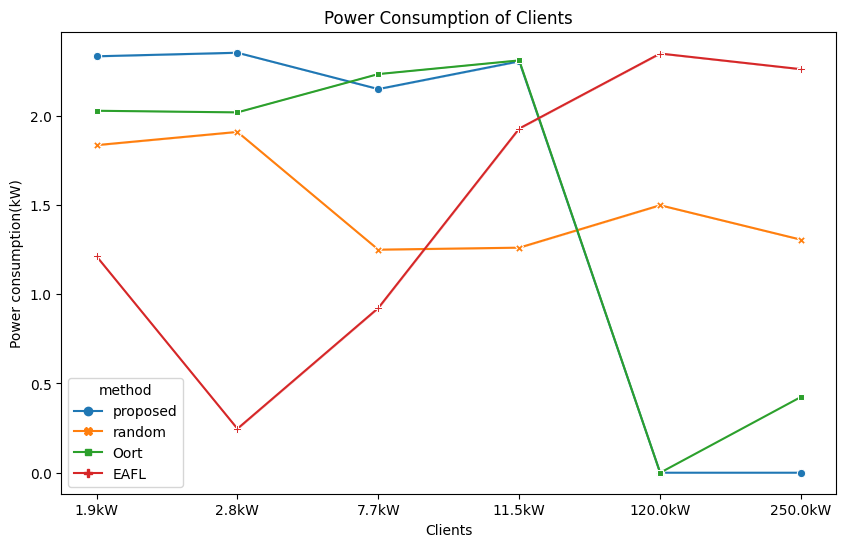

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터를 DataFrame으로 읽기
data = pd.read_csv('preprocessed_data.csv')  # 여기에서 'your_data.csv'는 실제 데이터 파일의 경로와 이름으로 바꿔야 합니다.

# 'selected' 값이 1인 데이터만 선택
data = data[data['selected'] == 1]
data = data[data['learning_step'] == 'training']

# 'method', 'selected', 그리고 'server_round'에 따른 'charge_speed'의 평균 계산
data['avg_charge_speed'] = data.groupby(['method','id'])['power_consumption'].transform('sum')

# 라인 그래프 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
sns.lineplot(x='id', y='avg_charge_speed', hue='method', style='method', markers=True, dashes=False, data=data)
plt.title('Power Consumption of Clients')
plt.xlabel('Clients')
plt.ylabel('Power consumption(kW)')
plt.show()


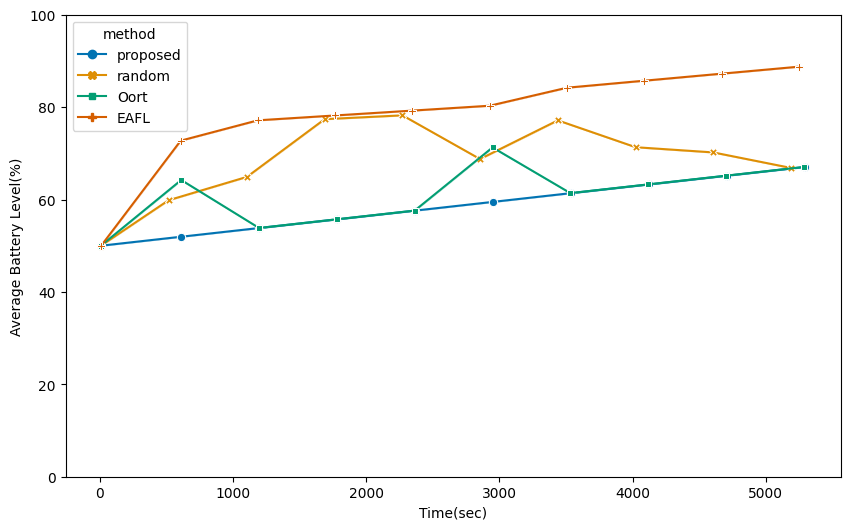

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터를 DataFrame으로 읽기
data = pd.read_csv('preprocessed_data.csv')  # 여기에서 'your_data.csv'는 실제 데이터 파일의 경로와 이름으로 바꿔야 합니다.

# 'selected' 값이 1인 데이터만 선택
data = data[data['selected'] == 1]
data = data[data['learning_step'] == 'training']

# 소수 2번째 자리까지 반올림
data['c-rate'] = round(data['charge_speed'] / 100, 2)

# 'method', 'selected', 그리고 'server_round'에 따른 'charge_speed'의 평균 계산
data['avg_battery_level'] = data.groupby(['method','elapsed_time'])['battery_level'].transform('mean')

# 라인 그래프 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
sns.lineplot(x='elapsed_time', y='avg_battery_level', hue='method', palette='colorblind', style='method', markers=True, dashes=False, data=data)
# plt.title('Average Battery level(%) of Method by Time')
plt.xlabel('Time(sec)')
plt.ylabel('Average Battery Level(%)')
plt.ylim(0, 100)
plt.show()


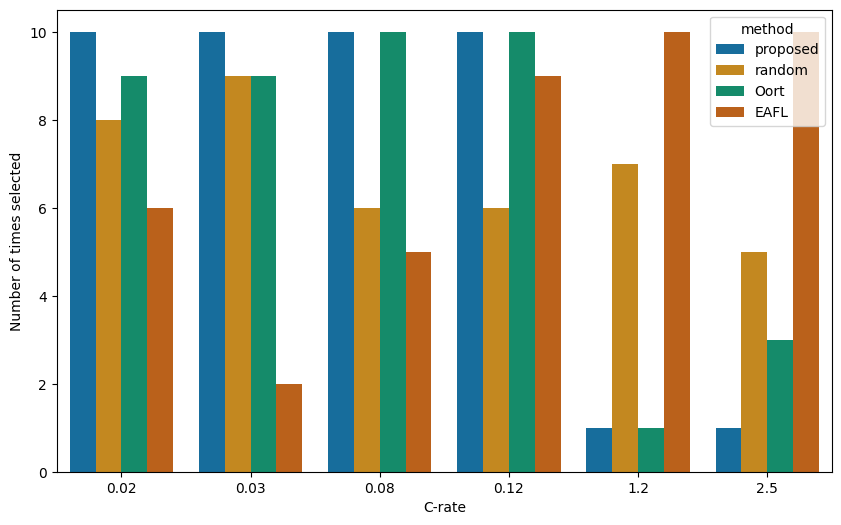

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터를 DataFrame으로 읽기
data = pd.read_csv('preprocessed_data.csv')  # 여기에서 'your_data.csv'는 실제 데이터 파일의 경로와 이름으로 바꿔야 합니다.

# 'selected' 값이 1인 데이터만 선택
data = data[data['selected'] == 1]
data = data[data['learning_step'] == 'training']


# 소수 2번째 자리까지 반올림
data['c-rate'] = round(data['charge_speed'] / 100, 2)

# 'method', 'selected', 그리고 'server_round'에 따른 'charge_speed'의 평균 계산
data['count_selected'] = data.groupby(['method','c-rate'])['selected'].transform('sum')

# 바 그래프 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
sns.barplot(x='c-rate', y='count_selected', hue='method', palette='colorblind', data=data)
# plt.title('Number of times selected by Method')
plt.xlabel('C-rate')
plt.ylabel('Number of times selected')
plt.show()


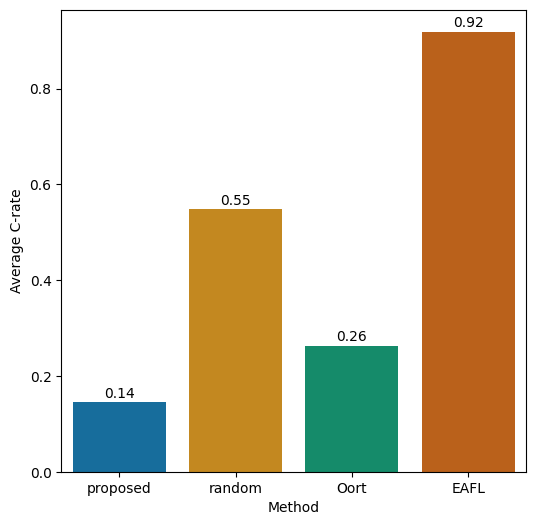

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터를 DataFrame으로 읽기
data = pd.read_csv('preprocessed_data.csv')  # 여기에서 'your_data.csv'는 실제 데이터 파일의 경로와 이름으로 바꿔야 합니다.

# 'selected' 값이 1인 데이터만 선택
data = data[data['selected'] == 1]
data = data[data['learning_step'] == 'training']


data['c-rate'] = data['charge_speed'] / 100

# 'method', 'selected', 그리고 'server_round'에 따른 'charge_speed'의 평균 계산
data['avg_c-rate'] = data.groupby(['method'])['c-rate'].transform('mean')

# 바 그래프 그리기
plt.figure(figsize=(6, 6))  # 그래프 크기 설정
ax = sns.barplot(x='method', y='avg_c-rate',  palette='colorblind', data=data)

# 각 막대에 해당하는 값을 막대 상단에 표시
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2), 
            y = height+0.01, 
            s = '{:.2f}'.format(height),  # 소수점 두 자리까지만 표시
            ha = 'center')

# plt.title('Average C-rate of selected clients per method')
plt.xlabel('Method')
plt.ylabel('Average C-rate')
plt.show()


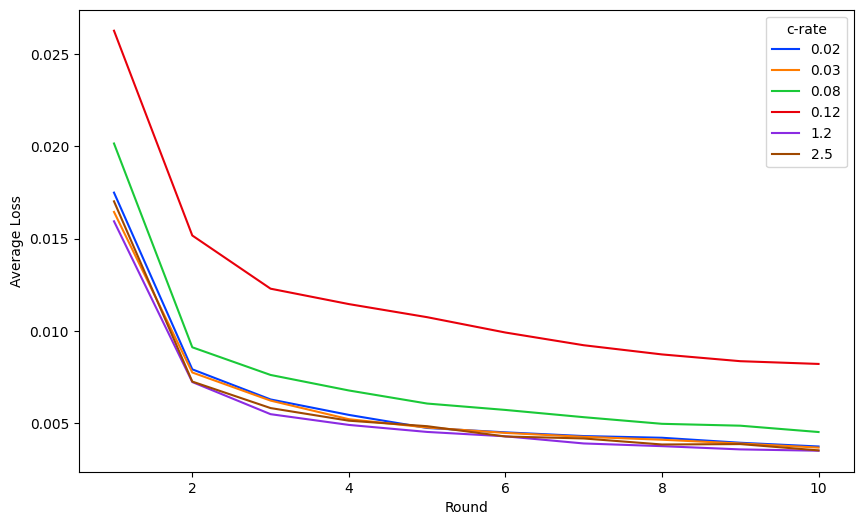

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터를 DataFrame으로 읽기
data = pd.read_csv('preprocessed_data.csv')  # 여기에서 'your_data.csv'는 실제 데이터 파일의 경로와 이름으로 바꿔야 합니다.

# 'selected' 값이 1인 데이터만 선택
data = data[data['selected'] == 0]
data = data[data['learning_step'] == 'evaluation']
data = data[data['method'] == 'Oort']

# 소수 2번째 자리까지 반올림
data['c-rate'] = round(data['charge_speed'] / 100, 2)

# 'method', 'selected', 그리고 'server_round'에 따른 'charge_speed'의 평균 계산
data['avg_battery_level'] = data.groupby(['c-rate','server_round'])['loss'].transform('mean')

# 라인 그래프 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
sns.lineplot(x='server_round', y='avg_battery_level', hue='c-rate', palette='bright' ,markers=True, dashes=False, data=data)
# plt.title('Average Battery level(%) of Method by Time')
plt.xlabel('Round')
plt.ylabel('Average Loss')
# plt.ylim(0, 100)
plt.show()


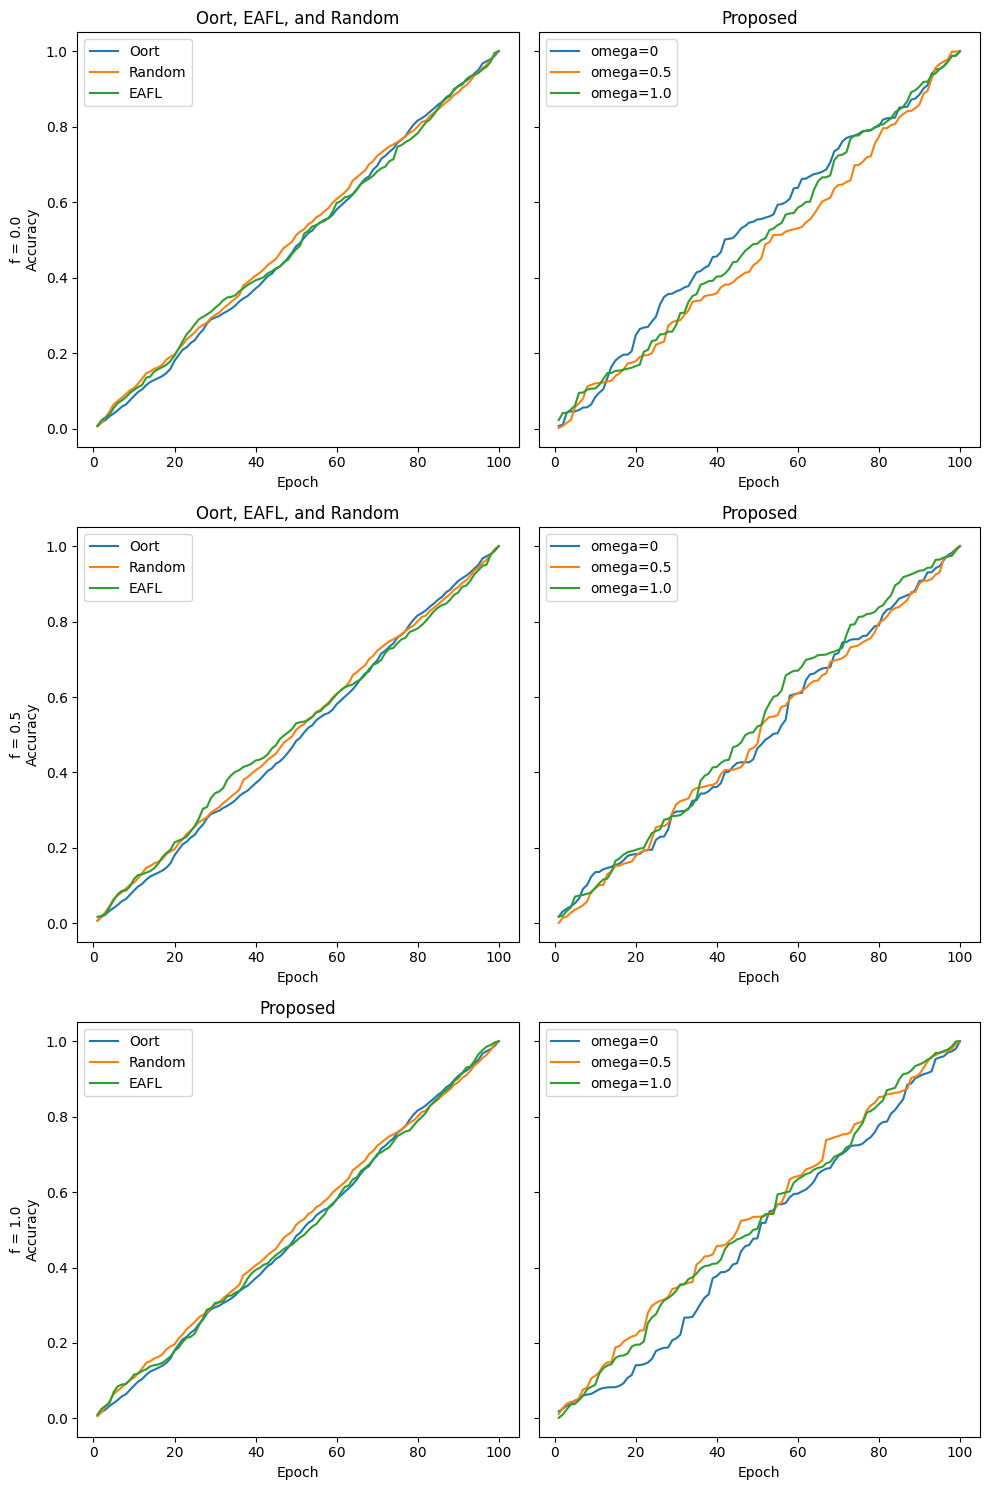

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 가짜 데이터 생성
np.random.seed(0)
n_epochs = 100  # 예를 들어, epoch는 100까지 있다고 가정
methods = ['Oort', 'EAFL', 'Proposed', 'Random']
omegas = [0, 0.5, 1.0]
fs = [0.0, 0.5, 1.0]

data = []
for method in methods:
    for omega in omegas:
        for f in fs:
            epochs = range(1, n_epochs+1)
            accuracies = np.cumsum(np.random.gamma(scale=0.01, shape=1, size=n_epochs))  # 선형 증가 + 감마 분포
            accuracies = accuracies / np.max(accuracies)  # 정규화
            data.extend(zip([f]*n_epochs, [method]*n_epochs, [omega]*n_epochs, epochs, accuracies))
df = pd.DataFrame(data, columns=['f', 'method', 'omega', 'epoch', 'accuracy'])


fig, axes = plt.subplots(3, 2, figsize=(10, 15), sharey='row')

# 첫 번째 서브플롯에서 Oort, EAFL, 그리고 Random 방법 그리기
for i, f in enumerate(fs):
    ax = axes[i, 0]
    ax.set_title('Oort, EAFL, and Random')
    ax.set_xlabel('Epoch')
    ax.set_ylabel(f'f = {f}\nAccuracy')
    
    for method in ['Oort', 'Random']:
        temp_df = df[(df['method'] == method)]
        avg_accuracy = temp_df.groupby('epoch')['accuracy'].mean()
        ax.plot(avg_accuracy.index, avg_accuracy, label=method)
    
    temp_df = df[(df['f'] == f) & (df['method'] == 'EAFL')]
    avg_accuracy = temp_df.groupby('epoch')['accuracy'].mean()
    ax.plot(avg_accuracy.index, avg_accuracy, label='EAFL')
    ax.legend()

# 두 번째 서브플롯에서 Proposed 방법 그리기
for i, f in enumerate(fs):
    ax.set_title('Proposed')
    ax = axes[i, 1]
    ax.set_xlabel('Epoch')
        
    for omega in omegas:
        temp_df = df[(df['f'] == f) & (df['method'] == 'Proposed') & (df['omega'] == omega)]
        sns.lineplot(x='epoch', y='accuracy', data=temp_df, ax=ax, label=f'omega={omega}')
    
    ax.legend()

plt.tight_layout()
plt.show()
